In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Plant_ID,Date,Temperature (�C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
0,1,8/3/2023,33.4,53,582,6.4,1
1,1,8/4/2023,33.5,53,451,6.1,2
2,1,8/5/2023,33.4,59,678,6.4,3
3,1,8/6/2023,33.4,68,420,6.4,4
4,1,8/7/2023,33.4,74,637,6.5,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Plant_ID          3169 non-null   int64  
 1   Date              3169 non-null   object 
 2   Temperature (�C)  3169 non-null   float64
 3   Humidity (%)      3169 non-null   int64  
 4   TDS Value (ppm)   3169 non-null   int64  
 5   pH Level          3169 non-null   float64
 6   Growth Days       3169 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 173.4+ KB


In [4]:
df.describe()

,Plant_ID,Temperature (�C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
count,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000
mean,35.441780,28.142222,64.873462,598.045440,6.399211,23.140107
std,20.243433,4.670521,8.988985,115.713047,0.234418,13.075415
min,1.000000,18.000000,50.000000,400.000000,6.000000,1.000000
25%,18.000000,23.600000,57.000000,498.000000,6.200000,12.000000
50%,35.000000,30.200000,65.000000,593.000000,6.400000,23.000000
75%,53.000000,31.500000,73.000000,699.000000,6.600000,34.000000
max,70.000000,33.500000,80.000000,800.000000,6.800000,48.000000


In [5]:
df.columns

Index(['Plant_ID', 'Date', 'Temperature (�C)', 'Humidity (%)',
       'TDS Value (ppm)', 'pH Level', 'Growth Days'],
      dtype='object')

In [6]:
#rename Temperature (�C)	to Temperature
df.rename(columns={'Temperature (�C)':'Temperature'}, inplace=True)
df.columns

Index(['Plant_ID', 'Date', 'Temperature', 'Humidity (%)', 'TDS Value (ppm)',
       'pH Level', 'Growth Days'],
      dtype='object')

In [7]:
df.isnull().sum()

Plant_ID           0
Date               0
Temperature        0
Humidity (%)       0
TDS Value (ppm)    0
pH Level           0
Growth Days        0
dtype: int64

In [8]:
#convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
#correlation matrix
corr = df.corr()
corr


,Plant_ID,Temperature,Humidity (%),TDS Value (ppm),pH Level,Growth Days
Plant_ID,1.000000,-0.670891,-0.031960,0.011703,-0.014827,-0.005229
Temperature,-0.670891,1.000000,0.028158,-0.011797,0.014120,-0.074601
Humidity (%),-0.031960,0.028158,1.000000,-0.006148,0.017195,-0.014481
TDS Value (ppm),0.011703,-0.011797,-0.006148,1.000000,-0.014981,-0.020633
pH Level,-0.014827,0.014120,0.017195,-0.014981,1.000000,0.003023
Growth Days,-0.005229,-0.074601,-0.014481,-0.020633,0.003023,1.000000


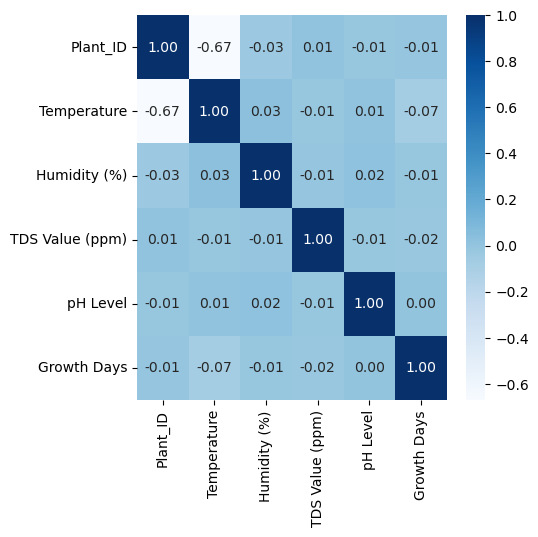

In [10]:
#heatmap graph of correlation matrix

plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.show()

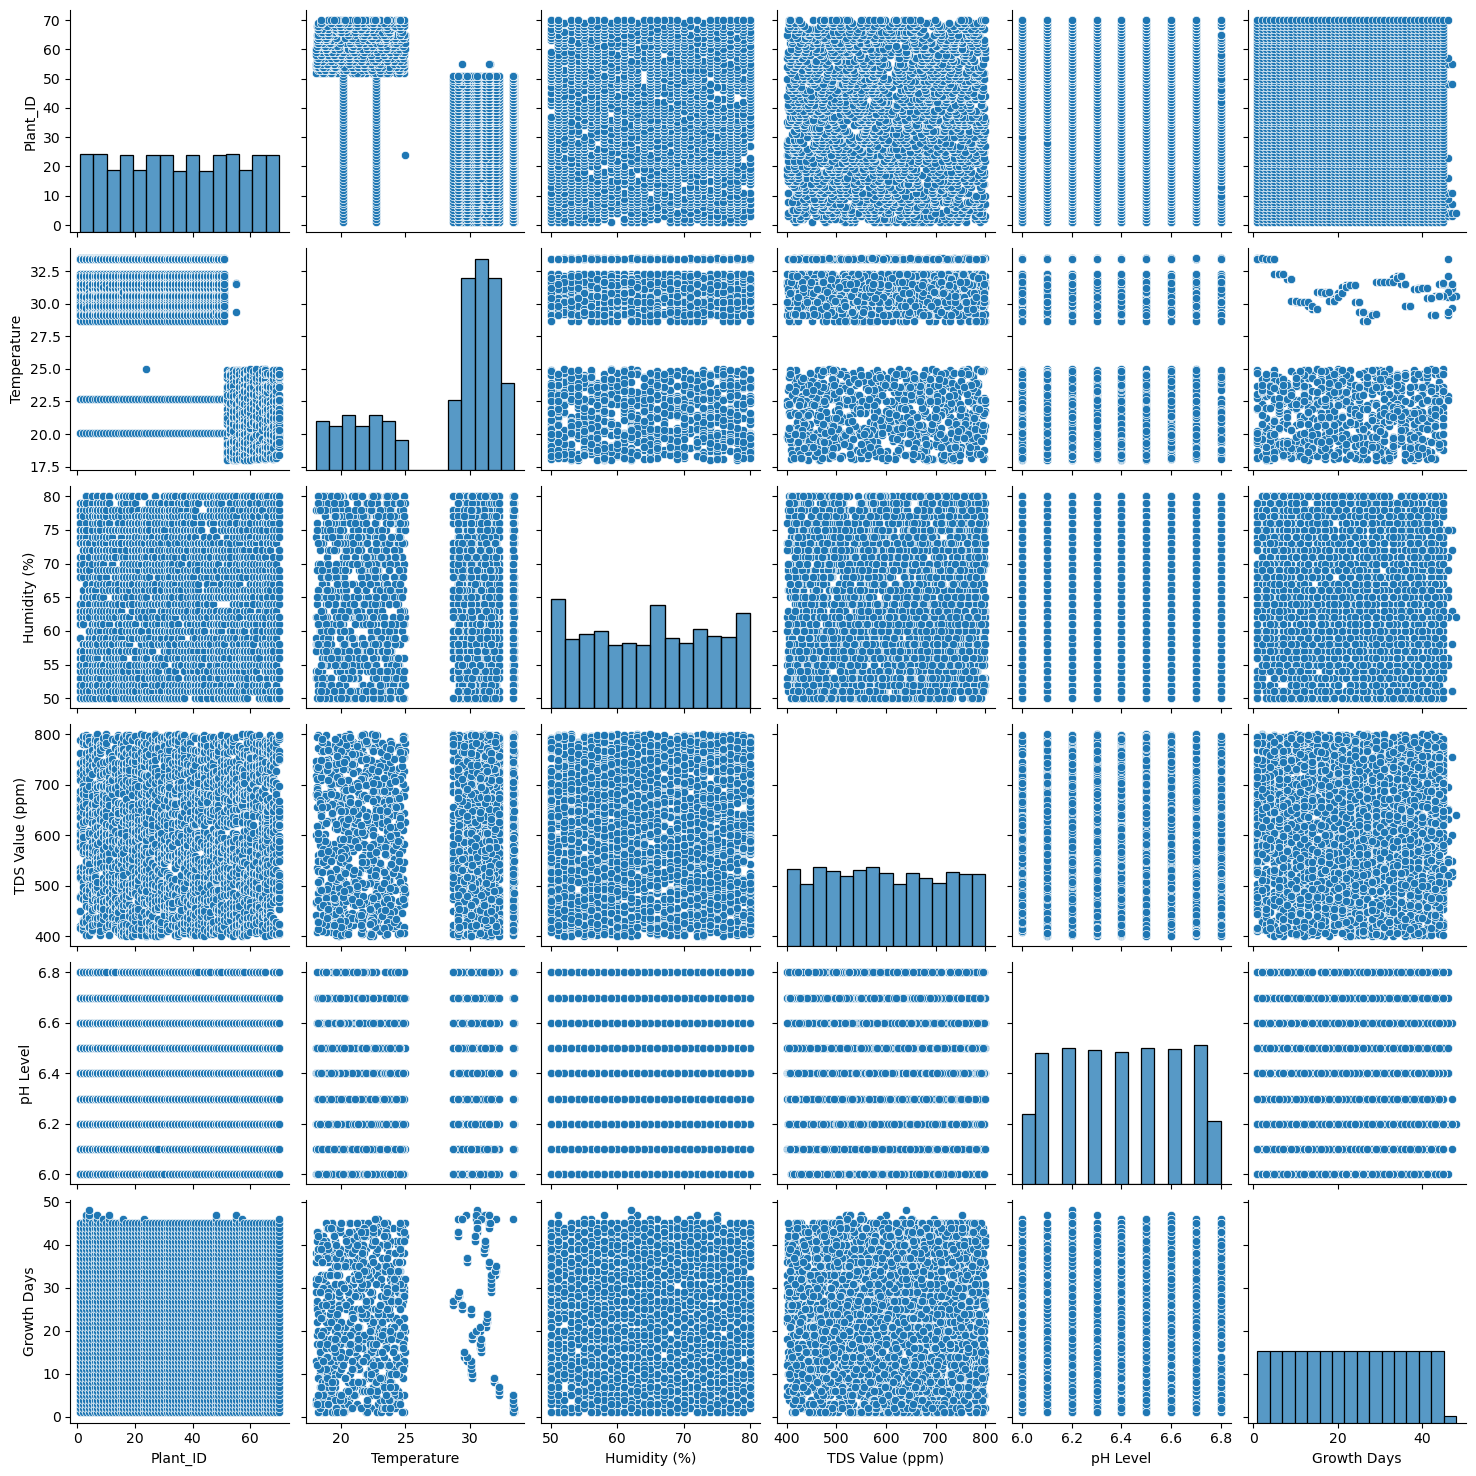

In [11]:
#pairplot
sns.pairplot(df)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_924\3350708701.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature'])


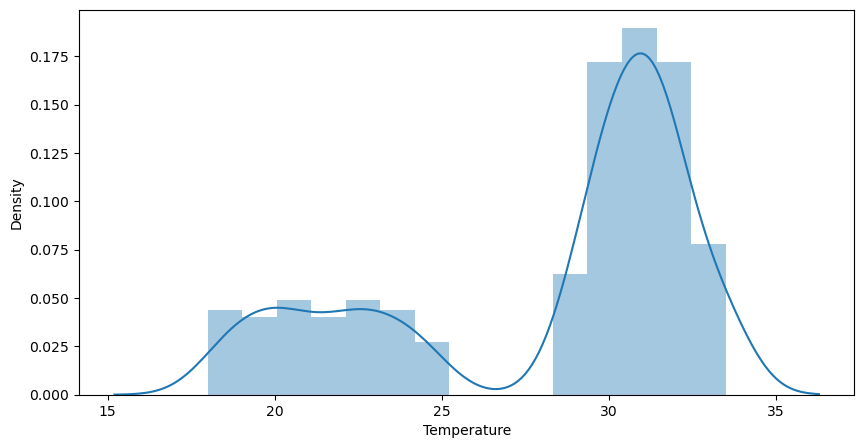

In [12]:
#distribution of temperature
plt.figure(figsize=(10,5))
sns.distplot(df['Temperature'])
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_924\701029479.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Humidity (%)'])


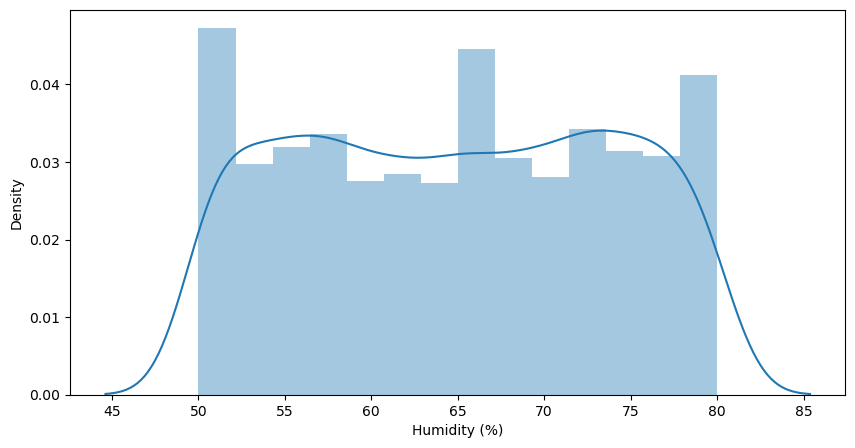

In [13]:
#distribution of humidity
plt.figure(figsize=(10,5))
sns.distplot(df['Humidity (%)'])
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_924\90566318.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TDS Value (ppm)'])


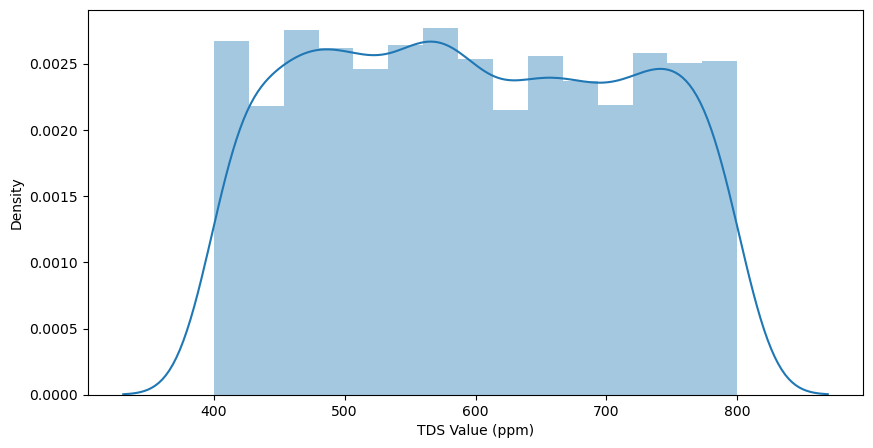

In [14]:
#distribution of TDS Value (ppm)
plt.figure(figsize=(10,5))
sns.distplot(df['TDS Value (ppm)'])
plt.show()


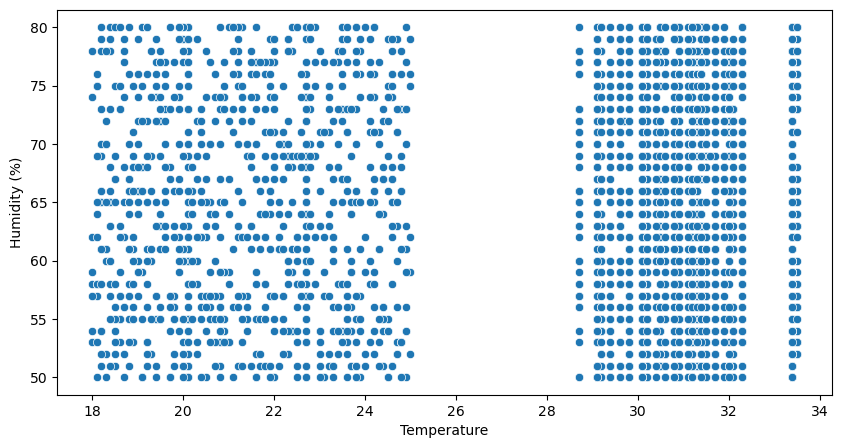

In [15]:
#bivariate analysis
#scatter plot of temperature and humidity
plt.figure(figsize=(10,5))
sns.scatterplot(x='Temperature', y='Humidity (%)', data=df)
plt.show()


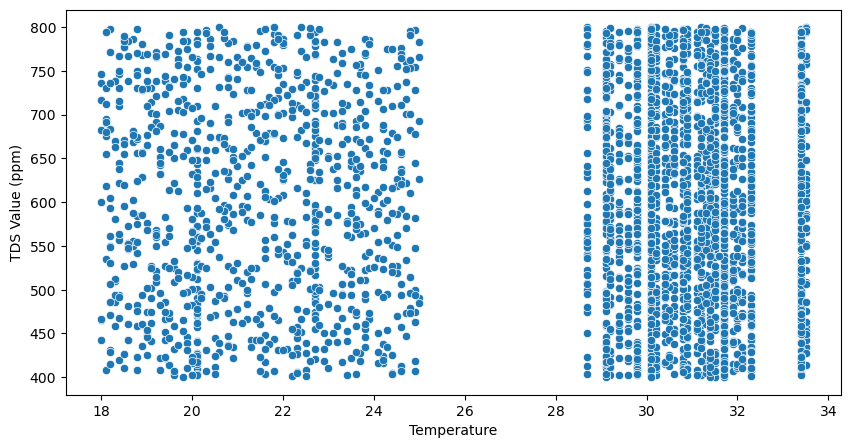

In [16]:
#scatter plot of temperature and TDS Value (ppm)
plt.figure(figsize=(10,5))
sns.scatterplot(x='Temperature', y='TDS Value (ppm)', data=df)
plt.show()

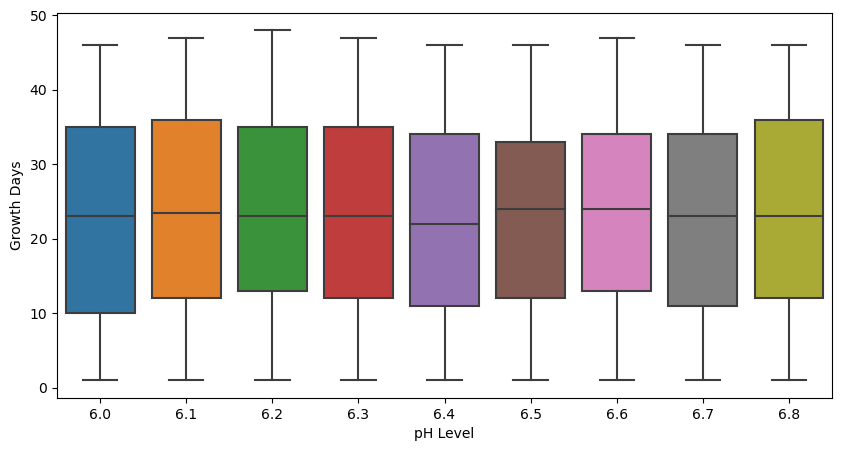

In [17]:
#boxplot growth days vs ph value
plt.figure(figsize=(10,5))
sns.boxplot(y='Growth Days', x='pH Level', data=df)
plt.show()



In [18]:
#select target variable
y = df['Growth Days']
X = df.drop(['Growth Days', "Date"], axis=1)

#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=42)


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [20]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 174.7323310503046
Mean Absolute Error (MAE): 11.32470915996695
R-squared Score: 0.010457020579249798

Results for Decision Tree:
Mean Squared Error (MSE): 115.45018915510718
Mean Absolute Error (MAE): 5.790668348045397
R-squared Score: 0.34618325375431536

Results for Random Forest:
Mean Squared Error (MSE): 67.47073253467845
Mean Absolute Error (MAE): 5.006948297604035
R-squared Score: 0.6179001945733507

Results for SVR:
Mean Squared Error (MSE): 176.61398412376656
Mean Absolute Error (MAE): 11.419342905456693
R-squared Score: -0.00019914463847259256

Results for XGBoost:
Mean Squared Error (MSE): 77.27629606135197
Mean Absolute Error (MAE): 5.5046356196737225
R-squared Score: 0.5623693921811448

Results for LightGBM:
Mean Squared Error (MSE): 69.34848819757049
Mean Absolute Error (MAE): 5.2218081106029395
R-squared Score: 0.6072661011453437

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 65.65701409878248
M

d:\python\odyn\anak2\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0:	learn: 12.7780812	total: 145ms	remaining: 2m 25s
1:	learn: 12.5816222	total: 147ms	remaining: 1m 13s
2:	learn: 12.4248272	total: 148ms	remaining: 49.3s
3:	learn: 12.2478636	total: 150ms	remaining: 37.3s
4:	learn: 12.0991736	total: 151ms	remaining: 30.1s
5:	learn: 11.9380991	total: 153ms	remaining: 25.3s
6:	learn: 11.8093861	total: 154ms	remaining: 21.9s
7:	learn: 11.6996457	total: 156ms	remaining: 19.3s
8:	learn: 11.5716688	total: 158ms	remaining: 17.4s
9:	learn: 11.4436847	total: 159ms	remaining: 15.8s
10:	learn: 11.3518522	total: 161ms	remaining: 14.4s
11:	learn: 11.2525016	total: 162ms	remaining: 13.3s
12:	learn: 11.1823436	total: 164ms	remaining: 12.4s
13:	learn: 11.0723314	total: 165ms	remaining: 11.6s
14:	learn: 10.9750488	total: 166ms	remaining: 10.9s
15:	learn: 10.8964131	total: 168ms	remaining: 10.3s
16:	learn: 10.8392270	total: 169ms	remaining: 9.78s
17:	learn: 10.7957756	total: 171ms	remaining: 9.31s
18:	learn: 10.7581131	total: 172ms	remaining: 8.9s
19:	learn: 10.7210393

In [21]:
accuracy

[0.010457020579249798,
 0.34618325375431536,
 0.6179001945733507,
 -0.00019914463847259256,
 0.5623693921811448,
 0.6072661011453437,
 0.6281716328017466,
 0.40373931363524296,
 -0.21268637771489485,
 -0.02981161734824478,
 0.6151459015666945]

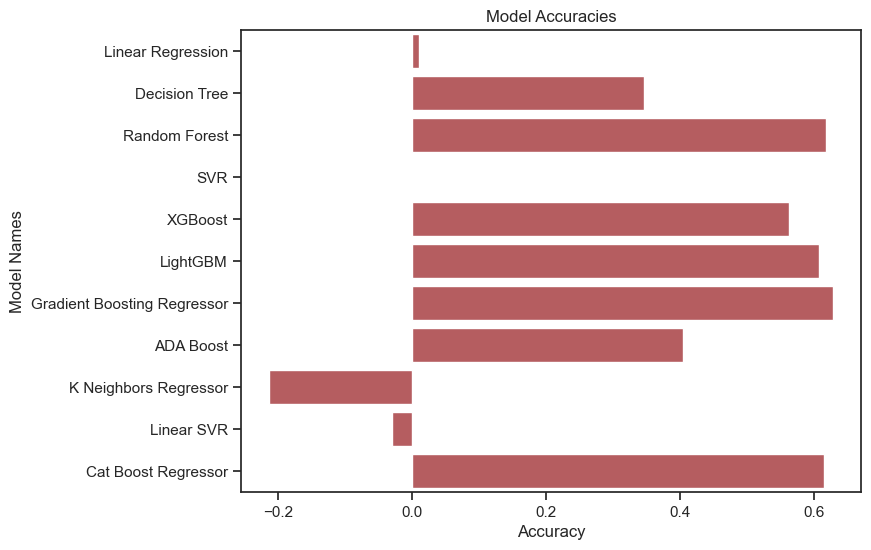

In [22]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

The best value for k neighbors in classification is: 1 with an accuracy of 0.0290


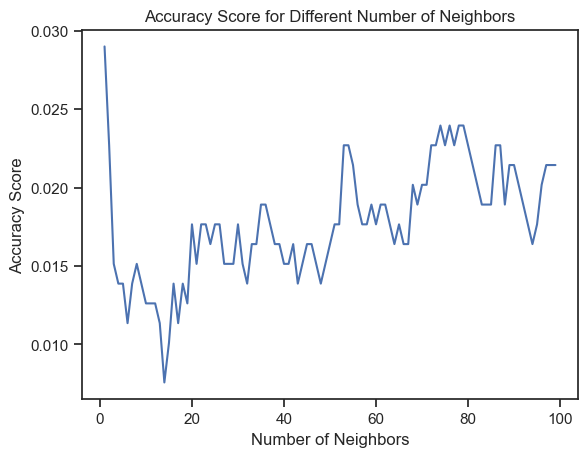

In [23]:
#create a function that checks for the best amount of neighbors
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def check_neighbors(X_train, y_train, X_test, y_test, k):
    best_score = 0
    best_k = 0
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        
        scores.append(score)
        neighbors.append(i)
        
        if score > best_score:
            best_score = score
            best_k = i
            
    return best_k, best_score, neighbors, scores

best_k, best_score, neighbors, scores = check_neighbors(X_train, y_train, X_test, y_test, 100)
print(f"The best value for k neighbors in classification is: {best_k} with an accuracy of {best_score:.4f}")

plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Number of Neighbors')
plt.show()


The best value for k neighbors in regression is: 0 with an R-squared score of 0.0000


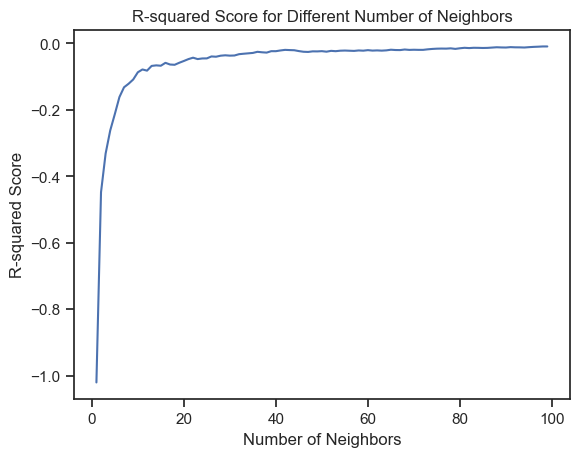

In [24]:
#create a function that checks for the best amount of neighbors
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

def check_neighbors(X_train, y_train, X_test, y_test, k):
    best_score = 0
    best_k = 0
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        
        scores.append(score)
        neighbors.append(i)
        
        if score > best_score:
            best_score = score
            best_k = i
            
    return best_k, best_score, neighbors, scores

best_k, best_score, neighbors, scores = check_neighbors(X_train, y_train, X_test, y_test, 100)
print(f"The best value for k neighbors in regression is: {best_k} with an R-squared score of {best_score:.4f}")

plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('R-squared Score')
plt.title('R-squared Score for Different Number of Neighbors')
plt.show()

In [25]:
#load unseen data and predict
df_unseen = pd.read_csv('unseen_data.csv')
df_unseen.head()


,Plant_ID,Date,Temperature (�C),Humidity (%),pH Level,TDS Value (ppm)
0,1,9/15/2023,30,60,6.5,500
1,1,9/16/2023,31,62,6.6,505
2,1,9/17/2023,26,58,6.4,495
3,1,9/18/2023,32,57,6.7,490
4,1,9/19/2023,25,59,6.5,500


In [26]:
#change date to datetime
df_unseen['Date'] = pd.to_datetime(df_unseen['Date'])


In [27]:
df_unseen.head()

,Plant_ID,Date,Temperature (�C),Humidity (%),pH Level,TDS Value (ppm)
0,1,2023-09-15,30,60,6.5,500
1,1,2023-09-16,31,62,6.6,505
2,1,2023-09-17,26,58,6.4,495
3,1,2023-09-18,32,57,6.7,490
4,1,2023-09-19,25,59,6.5,500


In [28]:
#rename Temperature (�C)	 to Temperature
df_unseen.rename(columns={'Temperature (�C)':'Temperature'}, inplace=True)
df_unseen.columns

Index(['Plant_ID', 'Date', 'Temperature', 'Humidity (%)', 'pH Level',
       'TDS Value (ppm)'],
      dtype='object')

In [29]:
#Switch the order of pH Level	TDS Value (ppm) columns
df_unseen = df_unseen[['Plant_ID', 'Date', 'Temperature', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level']]

In [30]:
# Train a machine learning model on the part of the dataset with the target variable
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
predictions = model.predict(df_unseen.drop(["Date"], axis=1))

In [32]:
print(predictions)

[24.87821561 24.47247911 26.45392404 24.2079812  26.83906975 24.88427159
 24.48265618 26.53702414 24.13892795 24.78291673 24.48822497 26.42243233
 24.11398018 26.9379157  24.88911653 24.43167581 26.37000425 24.13447514
 24.8563041  24.33032095 26.37557305 24.01988333 26.78130955 24.92535735
 24.43652075 26.38162903 24.03006039 26.86440965 24.8563041  24.33032095]


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# Perform K-fold cross-validation on the training data
scores = cross_val_score(model, X, y, cv=5)

# Print the average performance of the model across all K folds
print('Average R^2 score:', scores.mean())

Average R^2 score: -0.008246116723591167
